<a href="https://colab.research.google.com/github/AMR-21/Magic-Gamma-Telescope-Classification/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [352]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,recall_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Data Initialization

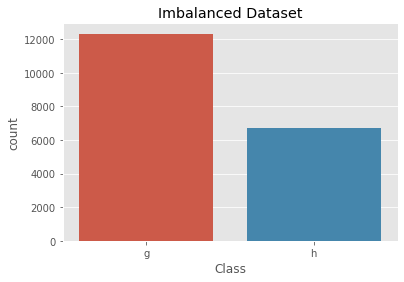

g    12332
h     6688
Name: class, dtype: int64


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [353]:
names= ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist',
'class']

imbalancedDataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data',names=names)


X = imbalancedDataset.drop(columns=['class'])
Y = imbalancedDataset['class']

plot = sns.countplot(x=Y)
plt.title('Imbalanced Dataset')
plt.xlabel('Class')
plt.show()
print(Y.value_counts())
imbalancedDataset

# Data Balancing

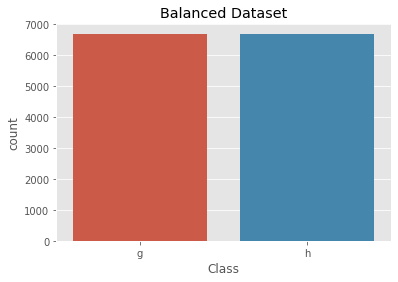

g    6688
h    6688
Name: class, dtype: int64


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,41.8269,26.3680,3.0422,0.2350,0.1202,24.1335,40.1360,20.4737,29.3920,173.6130,g
1,59.0164,18.0200,3.3073,0.2587,0.1422,57.7010,59.9175,15.4044,1.3107,237.6220,g
2,15.0205,12.1918,2.3560,0.6608,0.3370,1.9014,-2.0715,3.6258,89.2740,105.2140,g
3,51.4720,10.4108,2.5453,0.3276,0.1838,73.5451,17.7028,-7.1886,16.7782,176.5590,g
4,25.3814,15.7361,2.6186,0.4188,0.2419,27.8332,17.8775,5.4552,10.1725,80.3929,g
...,...,...,...,...,...,...,...,...,...,...,...
13371,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
13372,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
13373,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
13374,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [354]:
# Undersampling
under_sampler = RandomUnderSampler(random_state=42)
X,Y = under_sampler.fit_resample(X,Y)

plot = sns.countplot(x=Y)
plt.title('Balanced Dataset')
plt.xlabel('Class')
plt.show()
print(Y.value_counts())

balanced = X.copy()
balanced['class'] = Y
balanced

# Data Splitting

In [355]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.7001,stratify=Y)

print("Training set")
print(y_train.value_counts())

training = X_train.copy()
training['class'] = y_train

training


Training set
h    4682
g    4682
Name: class, dtype: int64


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
11372,133.1790,46.2426,3.1450,0.1969,0.1121,-2.8916,-129.0090,-35.3323,14.2320,336.6310,h
6644,64.2157,18.7027,2.8654,0.2849,0.1561,71.1655,54.1899,-9.6894,3.0290,230.0710,g
4538,47.9495,27.7213,3.0075,0.1808,0.0919,30.5484,11.0123,17.5218,11.2180,178.3680,g
12119,21.3860,13.6561,2.5682,0.5541,0.3662,-12.8325,-14.7031,12.0507,10.1420,146.3540,h
6134,19.4169,7.4028,2.1123,0.7568,0.4363,2.3493,-8.5268,-4.4851,20.4170,166.0910,g
...,...,...,...,...,...,...,...,...,...,...,...
7760,139.7250,27.6111,3.4177,0.1877,0.0946,-214.0940,86.5908,-23.0895,27.5810,130.9650,h
8289,52.1729,43.5335,2.8921,0.3026,0.1583,75.2285,-22.9855,-30.3114,66.5110,262.9700,h
5825,37.0047,13.8247,2.8448,0.3617,0.1866,-18.0340,24.8963,-9.3634,4.1448,221.8190,g
8194,10.9668,8.6714,2.2508,0.8190,0.4312,18.3514,20.9602,-1.4768,75.9919,183.5371,h


# Folding, Tuning, and Cross-Validation

In [356]:
def generateFolds():
  X_tra = X_train.copy()
  y_tra  = y_train.copy()
  X_tra['class'] = y_tra
  X_tra = X_tra.sample(frac = 1)
  X_tra=X_tra.groupby('class').sample(4682)
  X_tra = X_tra.reset_index(drop=True)

  X_traing = X_tra[0:4682]
  X_trainh = X_tra[4682:9364]
  X_trainh = X_trainh.reset_index(drop=True)

  #folds  
  frame1 = [X_traing.loc[0:935],X_trainh.loc[0:935]]
  fold1 = pd.concat(frame1)

  frame2 = [X_traing.loc[936:1871],X_trainh.loc[936:1871]]
  fold2 = pd.concat(frame2)    

  frame3 = [X_traing.loc[1872:2807],X_trainh.loc[1872:2807]]
  fold3 = pd.concat(frame3)    

  frame4 = [X_traing.loc[2808:3743],X_trainh.loc[2808:3743]]
  fold4 = pd.concat(frame4)    

  frame5 = [X_traing.loc[3744:],X_trainh.loc[3744:]]
  fold5 = pd.concat(frame5)

  train_val1 = pd.concat([fold1, fold2, fold3, fold4])
  test_val1 = fold5

  train_val2 = pd.concat([fold1, fold2, fold3, fold5])
  test_val2 = fold4

  train_val3 = pd.concat([fold1, fold2, fold4, fold5])
  test_val3 = fold3

  train_val4 = pd.concat([fold1, fold3, fold4, fold5])
  test_val4 = fold2

  train_val5 = pd.concat([fold2, fold3, fold4, fold5])
  test_val5 = fold1

  return (train_val1,test_val1),(train_val2,test_val2),(train_val3,test_val3),(train_val4,test_val4),(train_val5,test_val5)

def plotAccuarcy(x,y,label):
  fig,ax= plt.subplots()
  plt.style.use('ggplot')
  ax.plot(x,y);
  ax.set_title('Cross-Validation plot')
  ax.set_xlabel(label)
  ax.set_ylabel('mean accuarcy');

def tuneModel(model,param):
  folds = generateFolds() 
  parameter = tuple(param.keys())[0]
  values = tuple(param.values())[0]

  results = {}
  for v in values:
    accuarcy = []
    params = {parameter:v}
    model.set_params(**params)
    for train,test in folds:
      y = train['class']
      x = train.drop(columns=['class'])
      ytest = test['class']
      test = test.drop(columns=['class'])

      model.fit(x,y)
      pred = model.predict(test)
      accuarcy.append(accuracy_score(ytest, pred))
    results[v] = sum(accuarcy)/len(accuarcy)
  
  params = list(results.keys())
  avgMean = list(results.values())

  maxAcc = max(avgMean)
  index = avgMean.index(maxAcc)

  plotAccuarcy(params,avgMean,parameter)

  bestParameter = {parameter:params[index]}
  model.set_params(**bestParameter)

  best_parameter={"best_parameter":params[index]}
  best_score = {"best_score":maxAcc}

  return model,best_parameter,best_score,results

# Classifiers

In [357]:
def analyze(pred):
  print('Accuracy: ',accuracy_score(y_test, pred)*100 ,"%")
  print(classification_report(y_test, pred))


  fig, ax = plot_confusion_matrix(conf_mat= confusion_matrix(y_test, pred), figsize=(4, 4), cmap=plt.cm.Blues)
  ax.set_xticklabels(['', 'g', 'h'])
  ax.set_yticklabels(['', 'g', 'h']);
  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title('Confusion Matrix', fontsize=18)
  plt.show()


### Decision Tree

Accuracy:  78.96311066799602 %
              precision    recall  f1-score   support

           g       0.78      0.80      0.79      2006
           h       0.80      0.78      0.79      2006

    accuracy                           0.79      4012
   macro avg       0.79      0.79      0.79      4012
weighted avg       0.79      0.79      0.79      4012



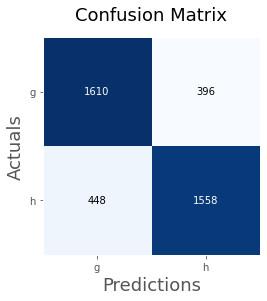

In [358]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
dt_pred = decision_tree.predict(X_test)

analyze(dt_pred)


### AdaBoost

#### Estimating value for n_estimators hyperparameter starting from 100 up to 700 with step of 20 then from 100 to 320 with step of 10 then from 280 to 300 with step 1
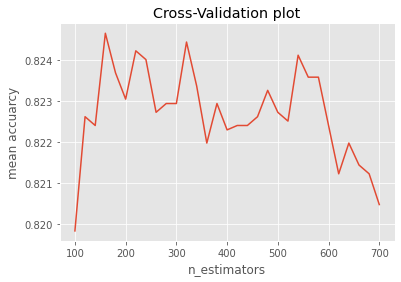 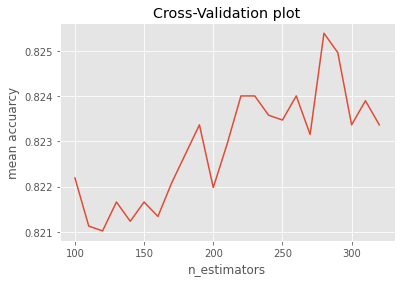
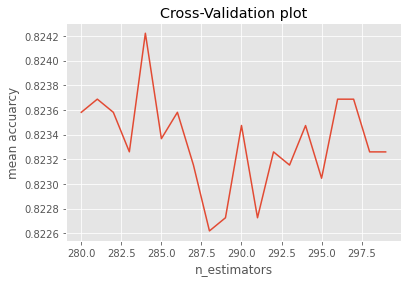

AdaBoostClassifier(n_estimators=284) 0.8242215791442045 

Accuracy:  82.57726819541375 %
              precision    recall  f1-score   support

           g       0.81      0.85      0.83      2006
           h       0.84      0.80      0.82      2006

    accuracy                           0.83      4012
   macro avg       0.83      0.83      0.83      4012
weighted avg       0.83      0.83      0.83      4012



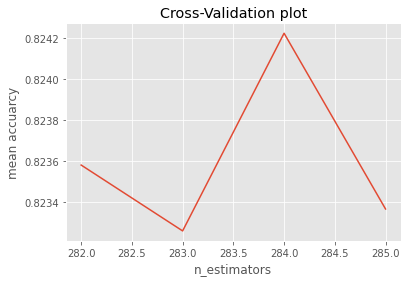

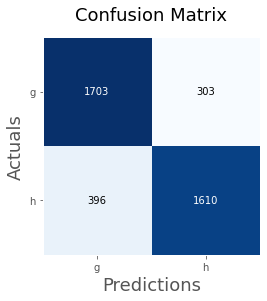

In [62]:
AdaBoostTune = AdaBoostClassifier()
estimators = np.arange(282,286,1)
AdaBoost,best_params,best_score = tuneModel(AdaBoostTune,{"n_estimators":estimators})

AdaBoost.fit(X_train, y_train)
ad_pred = AdaBoost.predict(X_test)
print(AdaBoost,best_score,"\n")

analyze(ad_pred)


### K-NN

KNeighborsClassifier(n_neighbors=11) {'best_score': 0.7708267271700108} 

Accuracy:  76.22133599202392 %
              precision    recall  f1-score   support

           g       0.72      0.86      0.78      2006
           h       0.83      0.66      0.74      2006

    accuracy                           0.76      4012
   macro avg       0.77      0.76      0.76      4012
weighted avg       0.77      0.76      0.76      4012



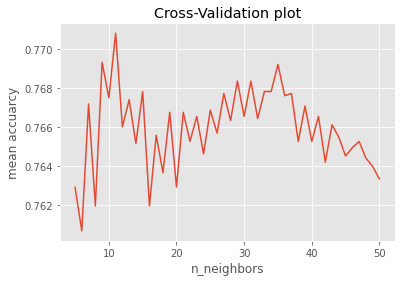

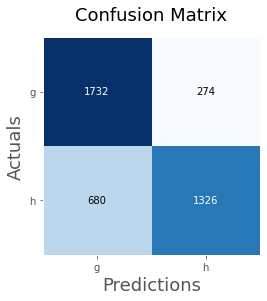

In [359]:
knnTune = KNeighborsClassifier()
k = np.arange(5, 51, 1)
knn,best_parameter,best_score,results = tuneModel(knnTune,{"n_neighbors":k})

knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print(knn,best_score,"\n")

analyze(knn_pred)

### Random Forests

#### Estimating value for n_estimators hyperparameter starting from 100 up to 700 with step of 20 then from 500 to 600 with step of 10 then from 579 to 581 with step 1
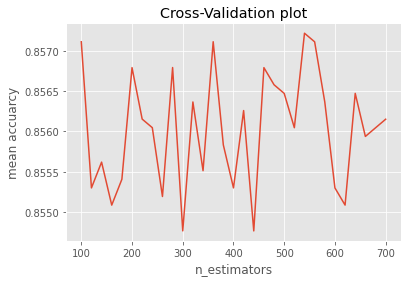 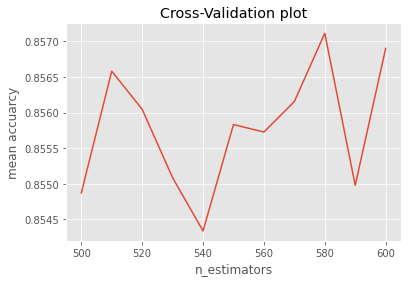

RandomForestClassifier(n_estimators=579) 0.8570054456393837 

Accuracy:  87.03888334995014 %
              precision    recall  f1-score   support

           g       0.86      0.89      0.87      2006
           h       0.88      0.85      0.87      2006

    accuracy                           0.87      4012
   macro avg       0.87      0.87      0.87      4012
weighted avg       0.87      0.87      0.87      4012



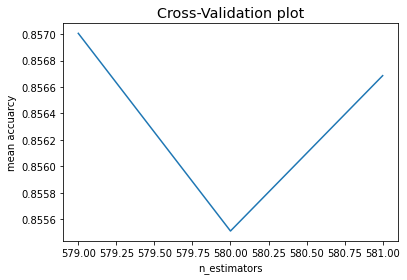

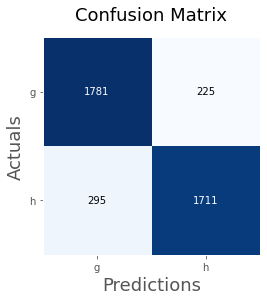

In [8]:
rfTune = RandomForestClassifier()
restimators = np.arange(579,582,1)
rf,best_params,best_score = tuneModel(rfTune,{"n_estimators":restimators})

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(rf,best_score,"\n")

analyze(rf_pred)

### Naive Bayes

Accuracy:  64.55633100697906 %
              precision    recall  f1-score   support

           g       0.60      0.89      0.72      2006
           h       0.79      0.40      0.53      2006

    accuracy                           0.65      4012
   macro avg       0.69      0.65      0.62      4012
weighted avg       0.69      0.65      0.62      4012



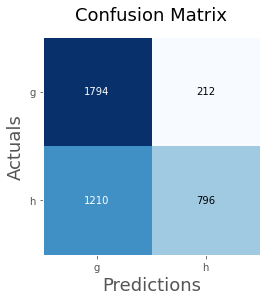

In [360]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

analyze(nb_pred)
